![](./image/pandas-logo.png)

# Python Pandas: Tips & Tricks

Oleh Channel YouTube [Indonesia Belajar](https://www.youtube.com/IndonesiaBelajarKomputer)

In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'scroll': True,
        'width': '100%',
        'height': '100%',
})

{'scroll': True, 'width': '100%', 'height': '100%'}

## \#01: Menyertakan Prefix dan Suffix pada seluruh Kolom Data Frame

### Import Modules

In [2]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [3]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,4,6,5,1,8
1,4,8,5,5,1
2,5,6,1,4,4
3,9,7,2,2,8
4,3,3,2,3,4


In [4]:
tuple('ABCDE')

('A', 'B', 'C', 'D', 'E')

### Menyertakan Prefix Kolom

In [5]:
df.add_prefix('kolom_')

,kolom_A,kolom_B,kolom_C,kolom_D,kolom_E
0,4,6,5,1,8
1,4,8,5,5,1
2,5,6,1,4,4
3,9,7,2,2,8
4,3,3,2,3,4


### Menyertakan Suffix Kolom

In [6]:
df.add_suffix('_field')

,A_field,B_field,C_field,D_field,E_field
0,4,6,5,1,8
1,4,8,5,5,1
2,5,6,1,4,4
3,9,7,2,2,8
4,3,3,2,3,4


## \#02: Pemilihan baris (rows selection) pada Data Frame

### Import Modules

In [7]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [8]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 5, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,2,4,1,2,4
1,2,4,4,3,4
2,2,2,4,2,3
3,3,3,3,4,1
4,3,2,3,3,4
5,3,2,4,3,1
6,4,4,2,4,4
7,2,4,2,2,1
8,2,3,2,4,2
9,3,2,4,1,3


### Selection dengan operator logika `|`

In [9]:
df[(df['A'] == 1) | (df['A'] == 3)]

,A,B,C,D,E
3,3,3,3,4,1
4,3,2,3,3,4
5,3,2,4,3,1
9,3,2,4,1,3


### Selection dengan fungsi `isin()`

In [10]:
df[df['A'].isin([1, 3])]

,A,B,C,D,E
3,3,3,3,4,1
4,3,2,3,3,4
5,3,2,4,3,1
9,3,2,4,1,3


### Mengenal operator negasi `~`

In [11]:
df[~df['A'].isin([1, 3])]

,A,B,C,D,E
0,2,4,1,2,4
1,2,4,4,3,4
2,2,2,4,2,3
6,4,4,2,4,4
7,2,4,2,2,1
8,2,3,2,4,2


## \#03: Konversi tipe data String ke Numerik pada kolom Data Frame

### Import Modules

In [12]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [13]:
data = {'col1':['1', '2', '3', 'teks'], 
        'col2':['1', '2', '3', '4']}

df = pd.DataFrame(data)
df

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [14]:
df.dtypes

col1    object
col2    object
dtype: object

### Konversi tipe data dengan fungsi `astype()`

In [15]:
df_x = df.astype({'col2':'int'})
df_x

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [16]:
df_x.dtypes

col1    object
col2     int64
dtype: object

### Konversi tipe data numerik dengan fungsi `to_numeric()`

In [17]:
df.apply(pd.to_numeric, errors='coerce')

,col1,col2
0,1.0,1
1,2.0,2
2,3.0,3
3,NaN,4


## \#04: Pemilihan kolom (columns selection) pada Data Frame berdasarkan tipe data

### Import Modules

In [18]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [19]:
n_rows = 5
n_cols = 2
cols = ['bil_pecahan', 'bil_bulat']

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df['bil_pecahan'] = df['bil_pecahan'].astype('float')

df.index = pd.util.testing.makeDateIndex(n_rows, freq='H')
df = df.reset_index()

df['teks'] = list('ABCDE')

df

/home/boedybios/anaconda3/lib/python3.7/site-packages/pandas/util/__init__.py:12: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


,index,bil_pecahan,bil_bulat,teks
0,2000-01-01 00:00:00,11.0,15,A
1,2000-01-01 01:00:00,13.0,8,B
2,2000-01-01 02:00:00,6.0,14,C
3,2000-01-01 03:00:00,13.0,15,D
4,2000-01-01 04:00:00,8.0,19,E


In [20]:
df.dtypes

index          datetime64[ns]
bil_pecahan           float64
bil_bulat               int64
teks                   object
dtype: object

### Memilih kolom bertipe data numerik

In [21]:
df.select_dtypes(include='number')

,bil_pecahan,bil_bulat
0,11.0,15
1,13.0,8
2,6.0,14
3,13.0,15
4,8.0,19


In [22]:
df.select_dtypes(include='float')

,bil_pecahan
0,11.0
1,13.0
2,6.0
3,13.0
4,8.0


In [23]:
df.select_dtypes(include='int')

,bil_bulat
0,15
1,8
2,14
3,15
4,19


### Memilih kolom bertipe data string atau `object`

In [24]:
df.select_dtypes(include='object')

,teks
0,A
1,B
2,C
3,D
4,E


### Memilih kolom bertipe data `datetime`

In [25]:
df.select_dtypes(include='datetime')

,index
0,2000-01-01 00:00:00
1,2000-01-01 01:00:00
2,2000-01-01 02:00:00
3,2000-01-01 03:00:00
4,2000-01-01 04:00:00


### Memilih kolom dengan kombinasi tipe data

In [26]:
df.select_dtypes(include=['number', 'object'])

,bil_pecahan,bil_bulat,teks
0,11.0,15,A
1,13.0,8,B
2,6.0,14,C
3,13.0,15,D
4,8.0,19,E


## \#05: Membalik urutan baris dan kolom pada Data Frame

### Import Modules

In [27]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [28]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,8,4,8,4,5
1,5,7,3,2,6
2,4,9,6,9,6
3,8,1,2,3,9
4,5,3,5,2,4


### Membalik urutan kolom

In [29]:
df.loc[:, ::-1]

,E,D,C,B,A
0,5,4,8,4,8
1,6,2,3,7,5
2,6,9,6,9,4
3,9,3,2,1,8
4,4,2,5,3,5


### Membalik urutan baris

In [30]:
df.loc[::-1]

,A,B,C,D,E
4,5,3,5,2,4
3,8,1,2,3,9
2,4,9,6,9,6
1,5,7,3,2,6
0,8,4,8,4,5


### Membalik urutan baris dan melakukan penyesuaian ulang `index`

In [31]:
df.loc[::-1].reset_index(drop=True)

,A,B,C,D,E
0,5,3,5,2,4
1,8,1,2,3,9
2,4,9,6,9,6
3,5,7,3,2,6
4,8,4,8,4,5


## \#06: Mengganti nama (label) kolom pada Data Frame

### Import Modules

In [32]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [33]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,5,3,9,3,4
1,1,2,7,4,5
2,7,9,7,1,8
3,9,4,6,6,8
4,5,2,4,7,3


### Mengganti nama (label) untuk sebuah kolom pada Data Frame

In [34]:
df.rename(columns={'C':'Hobi'})

,A,B,Hobi,D,E
0,5,3,9,3,4
1,1,2,7,4,5
2,7,9,7,1,8
3,9,4,6,6,8
4,5,2,4,7,3


### Mengganti nama (label) untuk banyak kolom pada Data Frame

In [35]:
df.rename(columns={'A':'Nama', 'B':'Alamat', 'D':'Kota'})

,Nama,Alamat,C,Kota,E
0,5,3,9,3,4
1,1,2,7,4,5
2,7,9,7,1,8
3,9,4,6,6,8
4,5,2,4,7,3


## \#07: Menghapus (drop) missing values (`NaN`)

### Import Modules

In [36]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [37]:
df = pd.util.testing.makeMissingDataframe().reset_index() 
df.head()

,index,A,B,C,D
0,ZtvtEsVSZx,0.483817,-0.536432,1.574685,-0.332699
1,f1Nr7d5bfO,NaN,0.241795,1.801221,NaN
2,So8p4VCazA,-0.641261,1.581072,NaN,-0.459725
3,PYlLg6xeAm,0.404405,1.686888,0.650871,0.901552
4,yBUdDUNysm,NaN,0.638553,1.533094,-0.896871


In [38]:
df = df.rename(columns={'index':'Z'})
df.head()

,Z,A,B,C,D
0,ZtvtEsVSZx,0.483817,-0.536432,1.574685,-0.332699
1,f1Nr7d5bfO,NaN,0.241795,1.801221,NaN
2,So8p4VCazA,-0.641261,1.581072,NaN,-0.459725
3,PYlLg6xeAm,0.404405,1.686888,0.650871,0.901552
4,yBUdDUNysm,NaN,0.638553,1.533094,-0.896871


In [39]:
df_backup = df.copy(deep=True)

### Menghapus (drop) setiap kolom yang mengandung missing values

In [40]:
df = df.dropna(axis='columns') 
df.head()

,Z
0,ZtvtEsVSZx
1,f1Nr7d5bfO
2,So8p4VCazA
3,PYlLg6xeAm
4,yBUdDUNysm


### Menghapus (drop) setiap baris yang mengandung missing values

In [41]:
df = df_backup.copy(deep=True)
df = df.dropna(axis='rows')
df.head()

,Z,A,B,C,D
0,ZtvtEsVSZx,0.483817,-0.536432,1.574685,-0.332699
3,PYlLg6xeAm,0.404405,1.686888,0.650871,0.901552
6,n2dPMhrGBv,-0.870929,0.655066,0.352094,-0.727468
7,t9dkDfQGvF,-0.122483,-0.464874,1.490641,0.844357
8,dhZRDDbSfQ,0.148348,-0.053105,0.987733,1.311798


### Persentase missing values untuk tiap kolom

In [42]:
df = df_backup.copy(deep=True)
df.isna().mean()

Z    0.000000
A    0.166667
B    0.066667
C    0.100000
D    0.066667
dtype: float64

### Menghapus (drop) setiap kolom yang mengandung missing values berdasarkan threshold

In [43]:
treshold = len(df) * 0.9
df = df.dropna(thresh=treshold, axis='columns')
df.head()

,Z,B,C,D
0,ZtvtEsVSZx,-0.536432,1.574685,-0.332699
1,f1Nr7d5bfO,0.241795,1.801221,NaN
2,So8p4VCazA,1.581072,NaN,-0.459725
3,PYlLg6xeAm,1.686888,0.650871,0.901552
4,yBUdDUNysm,0.638553,1.533094,-0.896871


## \#08: Memeriksa kesamaan antar dua buah kolom (Series) pada Data Frame

### Import Modules

In [44]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [45]:
data = {'A':[15, 15, 18, np.nan, 12], 
        'B':[15, 15, 18, np.nan, 12]}

df = pd.DataFrame(data)
df

,A,B
0,15.0,15.0
1,15.0,15.0
2,18.0,18.0
3,NaN,NaN
4,12.0,12.0


### Mengenal Pandas Series

In [46]:
df['A']

0    15.0
1    15.0
2    18.0
3     NaN
4    12.0
Name: A, dtype: float64

In [47]:
type(df['A'])

pandas.core.series.Series

In [48]:
type(df)

pandas.core.frame.DataFrame

### Memeriksa kesamaan dengan operator `==`

In [49]:
df['A'] == df['B']

0     True
1     True
2     True
3    False
4     True
dtype: bool

### Memeriksa kesamaan dengan method `equals()`

In [50]:
df['A'].equals(df['B'])

True

### Memeriksa kesamaan antar dua Data Frame

In [51]:
df1 = df.copy(deep=True)

df.equals(df1)

True

In [52]:
df == df1

,A,B
0,True,True
1,True,True
2,True,True
3,False,False
4,True,True


## \#09: Membagi Data Frame menjadi dua secara acak

### Import Modules

In [53]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [54]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,17,3,9,2,15
1,6,19,4,6,7
2,6,5,18,19,7
3,7,2,10,9,16
4,2,14,8,7,10
5,10,10,10,17,17
6,10,12,16,9,5
7,5,12,6,17,12
8,16,11,1,10,11
9,16,17,10,7,12


### Membagi Data Frame menjadi dua secara acak berdasarkan proporsi tertentu

In [55]:
df.shape

(10, 5)

In [56]:
proporsi = 0.7
df_1 = df.sample(frac=proporsi)
df_2 = df.drop(df_1.index)

print(f'df_1 shape: {df_1.shape}')
print(f'df_2 shape: {df_2.shape}')

df_1 shape: (7, 5)
df_2 shape: (3, 5)


In [57]:
df_1

,A,B,C,D,E
6,10,12,16,9,5
8,16,11,1,10,11
1,6,19,4,6,7
3,7,2,10,9,16
5,10,10,10,17,17
9,16,17,10,7,12
7,5,12,6,17,12


In [58]:
df_2

,A,B,C,D,E
0,17,3,9,2,15
2,6,5,18,19,7
4,2,14,8,7,10


## \#10: Mengganti nama (label) kolom pada Data Frame berdasarkan pola

### Import Modules

In [59]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [60]:
df = pd.read_csv('./data/titanicfull.csv')
df.columns = ['Pclass', 'Survival status', 'full Name', 'Sex  ', '  Age', 
              'Sib SP', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
df_backup = df.copy(deep=True)

df.head()

,Pclass,Survival status,full Name,Sex,Age,Sib SP,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### Menggunakan lowercase untuk nama kolom dan mengganti spasi dengan `_`

In [61]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,pclass,survival_status,full_name,sex__,__age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### Memangkas kelebihan spasi pada nama kolom

In [62]:
df = df_backup.copy(deep=True)

df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
df.head()

,pclass,survival_status,full_name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


## \#11: Melakukan seleksi kolom dan baris pada Data Frame menggunakan `loc`

### Import Modules

In [63]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [64]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,18,10,4,4,7
1,1,19,18,4,9
2,12,15,7,4,11
3,3,16,4,5,18
4,16,7,6,3,9
5,17,2,1,4,16
6,11,2,12,5,5
7,14,16,9,12,1
8,7,1,10,16,6
9,17,11,10,9,14


### Seleksi kolom dan baris menggunakan `loc`

In [65]:
df.loc[[0,3,4], ['B','E']]

,B,E
0,10,7
3,16,18
4,7,9


### Seleksi baris dengan kondisi

In [66]:
df.loc[df['B']>10, ['B','D','E']]

,B,D,E
1,19,4,9
2,15,4,11
3,16,5,18
7,16,12,1
9,11,9,14


### Slicing Data Frame dengan `loc`

In [67]:
df.loc[0:4, 'B':'D']

,B,C,D
0,10,4,4
1,19,18,4
2,15,7,4
3,16,4,5
4,7,6,3


## \#12: Membentuk kolom bertipe `datetime` dari sejumlah kolom lain pada Data Frame

### Import Modules

In [68]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [69]:
data = {'day':[1, 2, 10 ,25, 12], 
        'month':[1, 2, 4, 5, 6], 
        'year':[2000, 2001, 2010, 2015, 2020]}

df = pd.DataFrame(data)
df

,day,month,year
0,1,1,2000
1,2,2,2001
2,10,4,2010
3,25,5,2015
4,12,6,2020


### Membentuk kolom bertipe `datetime`

In [70]:
df['penaggalan'] = pd.to_datetime(df[['day', 'month', 'year']])
df

,day,month,year,penaggalan
0,1,1,2000,2000-01-01
1,2,2,2001,2001-02-02
2,10,4,2010,2010-04-10
3,25,5,2015,2015-05-25
4,12,6,2020,2020-06-12


In [71]:
df.dtypes

day                    int64
month                  int64
year                   int64
penaggalan    datetime64[ns]
dtype: object

## \#13: Konversi nilai numerik ke dalam sejumlah kategori

### Import Modules

In [72]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [73]:
n_rows = 10
n_cols = 1
cols = ('usia',)

df = pd.DataFrame(np.random.randint(1, 99, size=(n_rows, n_cols)), 
                  columns=cols)
df

,usia
0,42
1,14
2,10
3,8
4,65
5,22
6,46
7,71
8,18
9,20


### Pengelompokkan nilai numerik ke dalam beberapa kategori menggunakan `cut()`

In [74]:
df['kelompok_usia'] = pd.cut(df['usia'], 
                             bins=[0, 18, 65, 99], 
                             labels=['anak', 'dewasa', 'manula'])
df

,usia,kelompok_usia
0,42,dewasa
1,14,anak
2,10,anak
3,8,anak
4,65,dewasa
5,22,dewasa
6,46,dewasa
7,71,manula
8,18,anak
9,20,dewasa


## \#14: Menggabungkan (merge) dua Data Frame

### Import Modules

In [75]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [76]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,16,16,3,15,14
1,7,5,14,7,15
2,17,17,15,12,11
3,1,10,15,8,18
4,9,16,10,12,11


In [77]:
df1 = df.copy(deep=True)
df1 = df1.drop([1, 4])
df1

,A,B,C,D,E
0,16,16,3,15,14
2,17,17,15,12,11
3,1,10,15,8,18


In [78]:
df2 = df.copy(deep=True)
df2 = df2.drop([0, 3])
df2

,A,B,C,D,E
1,7,5,14,7,15
2,17,17,15,12,11
4,9,16,10,12,11


### Menggabungkan dua Data Frame

In [79]:
df_inner = pd.merge(df1, df2, how='inner')
df_inner

,A,B,C,D,E
0,17,17,15,12,11


In [80]:
df_outer = pd.merge(df1, df2, how='outer')
df_outer

,A,B,C,D,E
0,16,16,3,15,14
1,17,17,15,12,11
2,1,10,15,8,18
3,7,5,14,7,15
4,9,16,10,12,11


## \#15: Memecah nilai string dari suatu kolom ke dalam beberapa kolom baru

### Import Modules

In [81]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [82]:
data = {'nama':['Didi Kempot', 'Glenn Fredly', 'Mbah Surip'], 
        'tempat_kelahiran':['Surakarta, Jawa Tengah', 'Jakarta, DKI Jakarta', 'Mojokerto, Jawa Timur']}
df = pd.DataFrame(data)
df

,nama,tempat_kelahiran
0,Didi Kempot,"Surakarta, Jawa Tengah"
1,Glenn Fredly,"Jakarta, DKI Jakarta"
2,Mbah Surip,"Mojokerto, Jawa Timur"


### Memecah nama depan dan nama belakang

In [83]:
df[['nama_depan', 'nama_belakang']] = df['nama'].str.split(' ', expand=True)
df

,nama,tempat_kelahiran,nama_depan,nama_belakang
0,Didi Kempot,"Surakarta, Jawa Tengah",Didi,Kempot
1,Glenn Fredly,"Jakarta, DKI Jakarta",Glenn,Fredly
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip


### Memecah nama kota dan propinsi

In [84]:
df[['kota', 'propinsi']] = df['tempat_kelahiran'].str.split(',', expand=True)
df

,nama,tempat_kelahiran,nama_depan,nama_belakang,kota,propinsi
0,Didi Kempot,"Surakarta, Jawa Tengah",Didi,Kempot,Surakarta,Jawa Tengah
1,Glenn Fredly,"Jakarta, DKI Jakarta",Glenn,Fredly,Jakarta,DKI Jakarta
2,Mbah Surip,"Mojokerto, Jawa Timur",Mbah,Surip,Mojokerto,Jawa Timur


## \#16: Menata ulang Data Frame dengan mutiple indexes menggunakan `unstack()`

### Import Modules

In [85]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [86]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### Data Frame dengan multiple indexes dari hasil groupping

In [87]:
df.groupby(['sex', 'pclass'])['survived'].mean().to_frame()

survived
sex    pclass          
female 1       0.965278
       2       0.886792
       3       0.490741
male   1       0.340782
       2       0.146199
       3       0.152130

### Menata ulang Data Frame dengan mutiple indexes

In [88]:
df.groupby(['sex', 'pclass'])['survived'].mean().unstack()

pclass,1,2,3
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


## \#17: Resampling pada data deret waktu (time series data)

### Import Modules

In [89]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [90]:
n_rows = 365 * 24
n_cols = 2
cols = ['col1', 'col2']

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)

df.index = pd.util.testing.makeDateIndex(n_rows, freq='H')
df

,col1,col2
2000-01-01 00:00:00,12,3
2000-01-01 01:00:00,7,16
2000-01-01 02:00:00,18,3
2000-01-01 03:00:00,19,3
2000-01-01 04:00:00,12,18
...,...,...
2000-12-30 19:00:00,11,5
2000-12-30 20:00:00,4,8
2000-12-30 21:00:00,15,9
2000-12-30 22:00:00,7,4


### Resampling data dengan interval monthly

In [91]:
df.resample('M')['col1'].sum().to_frame()

,col1
2000-01-31,7284
2000-02-29,6838
2000-03-31,7500
2000-04-30,7281
2000-05-31,7360
2000-06-30,7145
2000-07-31,7717
2000-08-31,7309
2000-09-30,7078
2000-10-31,7450


### Resampling data dengan interval daily

In [92]:
df.resample('D')['col1'].sum().to_frame()

,col1
2000-01-01,252
2000-01-02,254
2000-01-03,218
2000-01-04,235
2000-01-05,216
...,...
2000-12-26,262
2000-12-27,263
2000-12-28,224
2000-12-29,261


## \#18: Membentuk dummy Data Frame

### Import Modules

In [93]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Membentuk Data Frame dari Dictionary

In [94]:
pd.DataFrame({'col1':[1, 2, 3, 4], 
              'col2':[5, 6, 7, 8]})

,col1,col2
0,1,5
1,2,6
2,3,7
3,4,8


### Membentuk Data Frame dari Numpy Array

In [95]:
n_rows = 5
n_cols = 3

arr = np.random.randint(1, 20, size=(n_rows, n_cols))
arr

array([[13, 14,  8],
       [ 7, 14, 10],
       [ 9, 10,  1],
       [19,  2, 16],
       [17, 16,  3]])

In [96]:
pd.DataFrame(arr, columns=tuple('ABC'))

,A,B,C
0,13,14,8
1,7,14,10
2,9,10,1
3,19,2,16
4,17,16,3


### Membentuk Data Frame dengan memanfaatkan  `pandas.util.testing`

In [97]:
pd.util.testing.makeDataFrame().head()

,A,B,C,D
nXuswkv9QV,0.384772,-1.265353,0.795950,-0.860510
awYljcums6,-0.191885,-0.328770,2.441803,1.827589
brguM5v94h,0.698504,0.056658,1.614705,0.767397
M9cTf9aOdJ,2.368440,1.554926,2.091522,0.629851
n6bys8iSdF,-0.109951,0.308420,0.328649,-1.623462


In [98]:
pd.util.testing.makeMixedDataFrame().head()

,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


In [99]:
pd.util.testing.makeTimeDataFrame().head()

,A,B,C,D
2000-01-03,0.201740,0.278574,0.241445,-1.165892
2000-01-04,0.468559,-0.737534,1.051249,-0.432672
2000-01-05,1.123342,0.192347,-0.122622,1.622374
2000-01-06,-1.458251,-0.801832,1.180558,1.319175
2000-01-07,0.998761,0.167478,1.748044,0.151453


In [100]:
pd.util.testing.makeMissingDataframe().head()

,A,B,C,D
KaqBfz2N5u,0.579574,1.565318,-0.560149,0.512926
WhcyVjeYjr,-2.246324,-0.592285,0.316919,NaN
mrWv8DwMpH,-0.003072,0.639773,0.182482,-2.277263
fNQrV9jEKq,NaN,0.765578,-0.294645,-1.096329
VxvV8pjT2f,-0.660850,0.464939,0.398375,-0.386349


## \#19: Formatting tampilan Data Frame

### Import Modules

In [101]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [102]:
n_rows = 5
n_cols = 2
cols = ['omset', 'operasional']

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df

,omset,operasional
0,8,14
1,4,6
2,17,3
3,15,11
4,4,9


In [103]:
df['omset'] = df['omset'] * 100_000
df['operasional'] = df['operasional'] * 10_000
df

,omset,operasional
0,800000,140000
1,400000,60000
2,1700000,30000
3,1500000,110000
4,400000,90000


In [104]:
df.index = pd.util.testing.makeDateIndex(n_rows, freq='D')
df = df.reset_index()
df = df.rename(columns={'index':'tanggal'})
df

,tanggal,omset,operasional
0,2000-01-01,800000,140000
1,2000-01-02,400000,60000
2,2000-01-03,1700000,30000
3,2000-01-04,1500000,110000
4,2000-01-05,400000,90000


### Melakukan formatting tampilan Data Frame

In [105]:
formatku = {'tanggal':'{:%d/%m/%y}', 
            'operasional':'Rp {:.2f}',
            'omset':'Rp {:.2f}'}

laporan = df.style.format(formatku)
laporan

,tanggal,omset,operasional
0,01/01/00,Rp 800000.00,Rp 140000.00
1,02/01/00,Rp 400000.00,Rp 60000.00
2,03/01/00,Rp 1700000.00,Rp 30000.00
3,04/01/00,Rp 1500000.00,Rp 110000.00
4,05/01/00,Rp 400000.00,Rp 90000.00


In [106]:
type(laporan)

pandas.io.formats.style.Styler

In [107]:
laporan.hide_index()

tanggal,omset,operasional
01/01/00,Rp 800000.00,Rp 140000.00
02/01/00,Rp 400000.00,Rp 60000.00
03/01/00,Rp 1700000.00,Rp 30000.00
04/01/00,Rp 1500000.00,Rp 110000.00
05/01/00,Rp 400000.00,Rp 90000.00


In [108]:
laporan.set_caption('Data Omset dan Operasional')

tanggal,omset,operasional
01/01/00,Rp 800000.00,Rp 140000.00
02/01/00,Rp 400000.00,Rp 60000.00
03/01/00,Rp 1700000.00,Rp 30000.00
04/01/00,Rp 1500000.00,Rp 110000.00
05/01/00,Rp 400000.00,Rp 90000.00


In [109]:
laporan.highlight_min('omset', color='pink')
laporan.highlight_max('omset', color='lightgreen')

laporan.highlight_min('operasional', color='lightblue')
laporan.highlight_max('operasional', color='grey')

tanggal,omset,operasional
01/01/00,Rp 800000.00,Rp 140000.00
02/01/00,Rp 400000.00,Rp 60000.00
03/01/00,Rp 1700000.00,Rp 30000.00
04/01/00,Rp 1500000.00,Rp 110000.00
05/01/00,Rp 400000.00,Rp 90000.00


## \#20: Menggabungkan (merge) dua Data Frame secara berdampingan

### Import Modules

In [110]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [111]:
d1 = {'col1':[1, 2, 3], 
      'col2':[10, 20, 30]}
df1 = pd.DataFrame(d1)
df1

,col1,col2
0,1,10
1,2,20
2,3,30


In [112]:
d2 = {'col3':[4, 5, 6], 
      'col4':[40, 50, 60]}
df2 = pd.DataFrame(d2)
df2

,col3,col4
0,4,40
1,5,50
2,6,60


### Menggabungkan (merge) dua Data Frame secara berdampingan

In [113]:
df = pd.merge(df1, df2, left_index=True, right_index=True)
df

,col1,col2,col3,col4
0,1,10,4,40
1,2,20,5,50
2,3,30,6,60


## \#21: Melakukan agregasi menggunakan `agg()`

### Import Modules

In [114]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [115]:
df = pd.read_csv('./data/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Mengenal `groupby()` dan fungsi agregasi

In [116]:
df.groupby('Species')['PetalLengthCm'].count().to_frame()

,PetalLengthCm
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [117]:
df.groupby('Species')['PetalLengthCm'].mean().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


In [118]:
df.groupby('Species')['PetalLengthCm'].median().to_frame()

,PetalLengthCm
Species,
Iris-setosa,1.50
Iris-versicolor,4.35
Iris-virginica,5.55


### Agregasi dengan `agg()`

In [119]:
df.groupby('Species')['PetalLengthCm'].agg(['count', 'mean', 'median'])

,count,mean,median
Species,,,
Iris-setosa,50,1.464,1.50
Iris-versicolor,50,4.260,4.35
Iris-virginica,50,5.552,5.55


### Agregasi dengan `describe()`

In [120]:
df.groupby('Species')['PetalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


## \#22: Memantau penggunaan memory suatu Data Frame

### Import Modules

In [121]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [122]:
df_titanic = pd.read_csv('./data/titanicfull.csv')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [123]:
df_iris = pd.read_csv('./data/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Memantau penggunaan memory suatu Data Frame

In [124]:
df_titanic.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 463.0 KB


In [125]:
df_iris.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB


### Memantau penggunaan memory untuk setiap kolom dari suatu Data Frame

In [126]:
df_titanic.memory_usage(deep=True)

Index          128
pclass       10472
survived     10472
name        110127
sex          80781
age          10472
sibsp        10472
parch        10472
ticket       83502
fare         10472
cabin        50414
embarked     86326
dtype: int64

In [127]:
df_iris.memory_usage(deep=True)

Index              128
Id                1200
SepalLengthCm     1200
SepalWidthCm      1200
PetalLengthCm     1200
PetalWidthCm      1200
Species          10550
dtype: int64

## \#23: Seleksi baris pada Data Frame dengan `query()`

### Import Modules

In [128]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [129]:
d = {'kolom_satu':[1, 2, 3, 4, 5], 
     'kolom dua':[10, 20, 30, 40, 50]}
df = pd.DataFrame(d)
df

,kolom_satu,kolom dua
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


### Seleksi baris dengan `query()`

In [130]:
df.query('kolom_satu > 2')

,kolom_satu,kolom dua
2,3,30
3,4,40
4,5,50


In [131]:
df.query('`kolom dua` > 30')

,kolom_satu,kolom dua
3,4,40
4,5,50


## \#24: UTC dan konversi zona waktu (time zone) pada Python Pandas

### Import Modules

In [132]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Series

In [133]:
s = pd.Series(range(1591683521, 1592201921, 3600))
s = pd.to_datetime(s, unit='s')
s.head()

0   2020-06-09 06:18:41
1   2020-06-09 07:18:41
2   2020-06-09 08:18:41
3   2020-06-09 09:18:41
4   2020-06-09 10:18:41
dtype: datetime64[ns]

[Unix Epoch Time](https://en.wikipedia.org/wiki/Unix_time) <br/>
[Epoch Time Converter](https://www.epochconverter.com/)

### Pengaturan zona waktu (time zone)

In [134]:
s = s.dt.tz_localize('UTC')
s.head()

0   2020-06-09 06:18:41+00:00
1   2020-06-09 07:18:41+00:00
2   2020-06-09 08:18:41+00:00
3   2020-06-09 09:18:41+00:00
4   2020-06-09 10:18:41+00:00
dtype: datetime64[ns, UTC]

In [135]:
s = s.dt.tz_convert('Asia/Jakarta')
s.head()

0   2020-06-09 13:18:41+07:00
1   2020-06-09 14:18:41+07:00
2   2020-06-09 15:18:41+07:00
3   2020-06-09 16:18:41+07:00
4   2020-06-09 17:18:41+07:00
dtype: datetime64[ns, Asia/Jakarta]

In [136]:
s = s.dt.tz_convert('Australia/Hobart')
s.head()

0   2020-06-09 16:18:41+10:00
1   2020-06-09 17:18:41+10:00
2   2020-06-09 18:18:41+10:00
3   2020-06-09 19:18:41+10:00
4   2020-06-09 20:18:41+10:00
dtype: datetime64[ns, Australia/Hobart]

## \#25: Pengaturan tampilan (display option) pada Python Pandas

### Import Modules

In [137]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [138]:
df = pd.read_csv('./data/titanicfull.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


### Pengaturan tampilan

In [139]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_colwidth', 20)

df

,pclass,survived,name,...,fare,cabin,embarked
0,1,1,"Allen, Miss. Eli...",...,211.3375,B5,S
1,1,1,"Allison, Master....",...,151.5500,C22 C26,S
...,...,...,...,...,...,...,...
1307,3,0,"Zakarian, Mr. Ortin",...,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",...,7.8750,NaN,S


In [140]:
pd.reset_option('^display.', silent=True)

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [141]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [default: 12] [currently: 12]
display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]
display.date_yearfirst 

## \#26: Membuat Data Frame dari hasil seleksi Spreadsheet

### Import Modules

In [142]:
import pandas as pd

print(pd.__version__)

1.0.5


### Membuat Data Frame dari hasil seleksi Spreadsheet

In [143]:
df = pd.read_clipboard()
df

,Seleksi,weekdays,dan,weekends,pada,data,deret,waktu,(time,series)


## \#27: Mengenal fungsi agregasi `first()` dan `last()`

### Import Modules

In [144]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [145]:
d = {'dokter':['Budi', 'Wati', 'Iwan', 'Budi', 'Budi', 'Wati'], 
     'pasien':['Abdul', 'Rahmat', 'Asep', 'Joko', 'Wiwin', 'Lisa']}

df = pd.DataFrame(d)
df

,dokter,pasien
0,Budi,Abdul
1,Wati,Rahmat
2,Iwan,Asep
3,Budi,Joko
4,Budi,Wiwin
5,Wati,Lisa


### Mengenal fungsi agregasi `first()` dan `last()`

In [146]:
df.groupby('dokter')['pasien'].count().to_frame()

,pasien
dokter,
Budi,3
Iwan,1
Wati,2


In [147]:
df.groupby('dokter')['pasien'].first().to_frame()

,pasien
dokter,
Budi,Abdul
Iwan,Asep
Wati,Rahmat


In [148]:
df.groupby('dokter')['pasien'].last().to_frame()

,pasien
dokter,
Budi,Wiwin
Iwan,Asep
Wati,Lisa


## \#28: Mengenal `explode` dan `implode` list pada Data Frame

### Import Modules

In [149]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [150]:
d = {'Team':['DC', 'Marvel'], 
     'Heroes':[['Batman', 'Superman', 'Wonder Woman', 'Aquaman', 'Green Lantern', 'Shazam'], 
               ['Iron Man', 'Captain America', 'Ant-Man', 'Black Panther', 'Captain Marvel']]}

df = pd.DataFrame(d)
df

,Team,Heroes
0,DC,"[Batman, Superman, Wonder Woman, Aquaman, Gree..."
1,Marvel,"[Iron Man, Captain America, Ant-Man, Black Pan..."


### Explode

In [151]:
df1 = df.explode('Heroes')
df1

,Team,Heroes
0,DC,Batman
0,DC,Superman
0,DC,Wonder Woman
0,DC,Aquaman
0,DC,Green Lantern
0,DC,Shazam
1,Marvel,Iron Man
1,Marvel,Captain America
1,Marvel,Ant-Man
1,Marvel,Black Panther


### Implode

In [152]:
d = {'Team':['DC', 'Marvel']}
df2 = pd.DataFrame(d)
df2

,Team
0,DC
1,Marvel


In [153]:
df2['Imploded'] = df1.groupby(df1.index)['Heroes'].agg(list)
df2

,Team,Imploded
0,DC,"[Batman, Superman, Wonder Woman, Aquaman, Gree..."
1,Marvel,"[Iron Man, Captain America, Ant-Man, Black Pan..."


## \#29: Melakukan random sampling pada Data Frame

### Import Modules

In [154]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [155]:
d = {'col_1':[1, 2, 3, 4, 5], 
     'col_2':[10, 20, 30, 40, 50]}
df = pd.DataFrame(d)
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


### Random sampling with/without replacement

In [156]:
df.sample(n=4, replace=False, random_state=0)

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


In [157]:
df.sample(n=4, replace=True, random_state=0)

,col_1,col_2
4,5,50
0,1,10
3,4,40
3,4,40


## \#30: Akses nilai variabel pada `query()`

### Import Modules

In [158]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [159]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,15,5,4,19,16
1,2,17,17,3,7
2,12,8,8,8,13
3,9,17,11,19,4
4,5,15,18,3,17


### Akses nilai variabel pada `query()`

In [160]:
df.query('A > 10')

,A,B,C,D,E
0,15,5,4,19,16
2,12,8,8,8,13


In [161]:
rerata = df['A'].mean()
rerata

8.6

In [162]:
df.query('A > @rerata')

,A,B,C,D,E
0,15,5,4,19,16
2,12,8,8,8,13
3,9,17,11,19,4


## \#31: Mengenal tipe data ordinal pada Pandas

### Import Modules

In [163]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [164]:
d = {'pelanggan':[11, 12, 13, 14], 
     'kepuasan':['baik', 'cukup', 'buruk', 'cukup']}

df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


### Tipe data ordinal pada Pandas

In [165]:
from pandas.api.types import CategoricalDtype

tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'], 
                                    ordered=True)

df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [166]:
df = df.sort_values('kepuasan', ascending=True)
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [167]:
df[df['kepuasan'] >= 'cukup']

,pelanggan,kepuasan
1,12,cukup
3,14,cukup
0,11,baik


## \#32: Plotting dari suatu Pandas Data Frame

### Import Modules

In [168]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [169]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df.head()

,A,B,C,D,E
0,18,17,13,2,9
1,1,2,13,4,2
2,19,14,9,16,16
3,3,13,18,9,4
4,3,7,13,13,12


### Line Plot

In [170]:
df.head()

,A,B,C,D,E
0,18,17,13,2,9
1,1,2,13,4,2
2,19,14,9,16,16
3,3,13,18,9,4
4,3,7,13,13,12


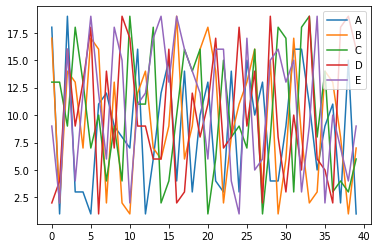

In [171]:
df.plot(kind='line')

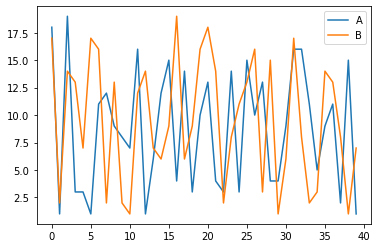

In [172]:
df[['A', 'B']].plot(kind='line')

### Bar Plot

In [173]:
df.head()

,A,B,C,D,E
0,18,17,13,2,9
1,1,2,13,4,2
2,19,14,9,16,16
3,3,13,18,9,4
4,3,7,13,13,12


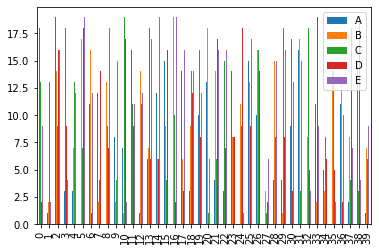

In [174]:
df.plot(kind='bar')

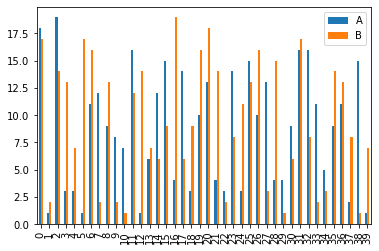

In [175]:
df[['A', 'B']].plot(kind='bar')

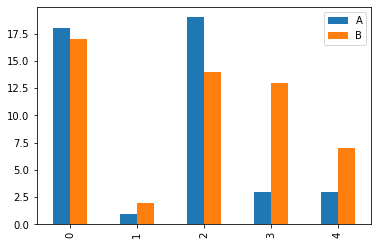

In [176]:
df[['A', 'B']].head().plot(kind='bar')

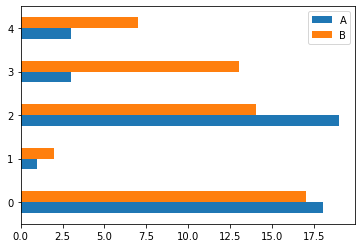

In [177]:
df[['A', 'B']].head().plot(kind='barh')

### Area Plot

In [178]:
df.head()

,A,B,C,D,E
0,18,17,13,2,9
1,1,2,13,4,2
2,19,14,9,16,16
3,3,13,18,9,4
4,3,7,13,13,12


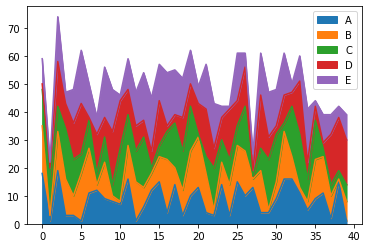

In [179]:
df.plot(kind='area')

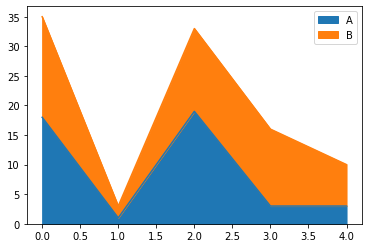

In [180]:
df[['A', 'B']].head().plot(kind='area')

### Box Plot

In [181]:
df.head()

,A,B,C,D,E
0,18,17,13,2,9
1,1,2,13,4,2
2,19,14,9,16,16
3,3,13,18,9,4
4,3,7,13,13,12


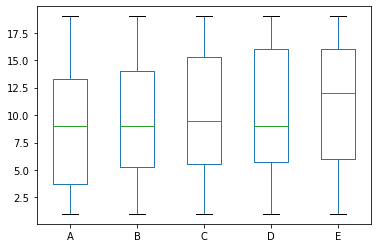

In [182]:
df.plot(kind='box')

### Histogram

In [183]:
df.head()

,A,B,C,D,E
0,18,17,13,2,9
1,1,2,13,4,2
2,19,14,9,16,16
3,3,13,18,9,4
4,3,7,13,13,12


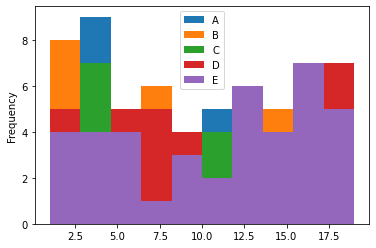

In [184]:
df.plot(kind='hist')

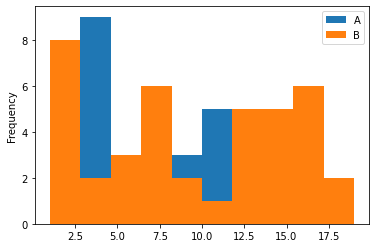

In [185]:
df[['A', 'B']].plot(kind='hist')

### Kernel Density Estimation (KDE)

In [186]:
df.head()

,A,B,C,D,E
0,18,17,13,2,9
1,1,2,13,4,2
2,19,14,9,16,16
3,3,13,18,9,4
4,3,7,13,13,12


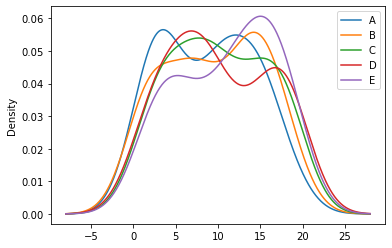

In [187]:
df.plot(kind='kde')

### Scatter Plot

In [188]:
df.head()

,A,B,C,D,E
0,18,17,13,2,9
1,1,2,13,4,2
2,19,14,9,16,16
3,3,13,18,9,4
4,3,7,13,13,12


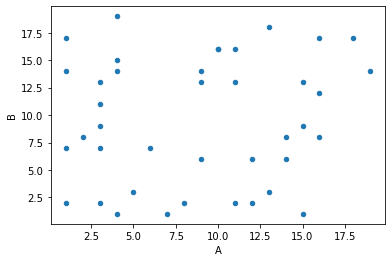

In [189]:
df.plot(x='A', y='B', kind='scatter')

## \#33: Menampilkan nilai kumulatif (cummulative)

### Import Modules

In [190]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [191]:
d = {'pemain':['Budi', 'Joni', 'Iwan', 'Budi', 'Budi', 'Iwan', 'Asep', 'Joni'], 
     'goal':[2, 1, 3, 1, 1, 2, 2, 3]}
df = pd.DataFrame(d)
df

,pemain,goal
0,Budi,2
1,Joni,1
2,Iwan,3
3,Budi,1
4,Budi,1
5,Iwan,2
6,Asep,2
7,Joni,3


### Menampilkan nilai kumulatif (cummulative)

In [192]:
df['goal'].cumsum().to_frame()

,goal
0,2
1,3
2,6
3,7
4,8
5,10
6,12
7,15


In [193]:
df['jumlah_goal_kumulatif'] = df['goal'].cumsum()
df

,pemain,goal,jumlah_goal_kumulatif
0,Budi,2,2
1,Joni,1,3
2,Iwan,3,6
3,Budi,1,7
4,Budi,1,8
5,Iwan,2,10
6,Asep,2,12
7,Joni,3,15


In [194]:
df['jumlah_goal_kumulatif_tiap_pemain'] = df.groupby('pemain')['goal'].cumsum()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain
0,Budi,2,2,2
1,Joni,1,3,1
2,Iwan,3,6,3
3,Budi,1,7,3
4,Budi,1,8,4
5,Iwan,2,10,5
6,Asep,2,12,2
7,Joni,3,15,4


In [195]:
df['cummax'] = df['goal'].cummax()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax
0,Budi,2,2,2,2
1,Joni,1,3,1,2
2,Iwan,3,6,3,3
3,Budi,1,7,3,3
4,Budi,1,8,4,3
5,Iwan,2,10,5,3
6,Asep,2,12,2,3
7,Joni,3,15,4,3


In [196]:
df['cummin'] = df['goal'].cummin()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax,cummin
0,Budi,2,2,2,2,2
1,Joni,1,3,1,2,1
2,Iwan,3,6,3,3,1
3,Budi,1,7,3,3,1
4,Budi,1,8,4,3,1
5,Iwan,2,10,5,3,1
6,Asep,2,12,2,3,1
7,Joni,3,15,4,3,1


In [197]:
df['cumprod'] = df['goal'].cumprod()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax,cummin,cumprod
0,Budi,2,2,2,2,2,2
1,Joni,1,3,1,2,1,2
2,Iwan,3,6,3,3,1,6
3,Budi,1,7,3,3,1,6
4,Budi,1,8,4,3,1,6
5,Iwan,2,10,5,3,1,12
6,Asep,2,12,2,3,1,24
7,Joni,3,15,4,3,1,72


## \#34: Mapping pada Data Frame dengan `applymap()`

### Import Modules

In [198]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [199]:
df = pd.DataFrame({'jenis_kelamin':['Pria', 'Wanita', 'lelaki', 'Lelaki', 'perempuan'], 
                   'usia':[23, 21, 24, 22, 21], 
                   'shift':['pagi', 'siang', 'Malam', 'Siang', 'pagi']})
df

,jenis_kelamin,usia,shift
0,Pria,23,pagi
1,Wanita,21,siang
2,lelaki,24,Malam
3,Lelaki,22,Siang
4,perempuan,21,pagi


### Mapping pada Data Frame dengan `applymap()`

In [200]:
df = df.applymap(lambda x: x.lower() if type(x) == str else x)
df

,jenis_kelamin,usia,shift
0,pria,23,pagi
1,wanita,21,siang
2,lelaki,24,malam
3,lelaki,22,siang
4,perempuan,21,pagi


### `applymap()` dengan dictionary

In [201]:
mapping = {'pria':'L',
           'lelaki':'L',
           'wanita':'P',
           'perempuan':'P',
           'pagi':1,
           'siang':2,
           'malam':3}

df.applymap(mapping.get)

,jenis_kelamin,usia,shift
0,L,None,1
1,P,None,2
2,L,None,3
3,L,None,2
4,P,None,1


In [202]:
df[['jenis_kelamin', 'shift']] = df[['jenis_kelamin', 'shift']].applymap(mapping.get)

df

,jenis_kelamin,usia,shift
0,L,23,1
1,P,21,2
2,L,24,3
3,L,22,2
4,P,21,1


## \#35: Memadukan fungsi agregasi dengan `transform()`

### Import Modules

In [203]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [204]:
d = {'no_nota':[1, 1, 1, 2, 2, 3, 4, 5], 
     'kopi': ['latte', 'cappuccino', 'espresso', 'latte', 'espresso', 'cappuccino', 'latte', 'espresso'],
     'harga':[50, 60, 80, 150, 120, 60, 100, 40]}

df = pd.DataFrame(d)
df

,no_nota,kopi,harga
0,1,latte,50
1,1,cappuccino,60
2,1,espresso,80
3,2,latte,150
4,2,espresso,120
5,3,cappuccino,60
6,4,latte,100
7,5,espresso,40


### Menghitung total harga untuk tiap nomor nota

In [205]:
df.groupby('no_nota')['harga'].sum().to_frame()

,harga
no_nota,
1,190
2,270
3,60
4,100
5,40


In [206]:
df['total_harga'] = df.groupby('no_nota')['harga'].transform(sum)
df

,no_nota,kopi,harga,total_harga
0,1,latte,50,190
1,1,cappuccino,60,190
2,1,espresso,80,190
3,2,latte,150,270
4,2,espresso,120,270
5,3,cappuccino,60,60
6,4,latte,100,100
7,5,espresso,40,40


### Menghitung total omset untuk tiap jenis kopi yang terjual

In [207]:
df.groupby('kopi')['harga'].sum().to_frame()

,harga
kopi,
cappuccino,120
espresso,240
latte,300


In [208]:
df['total_omset'] = df.groupby('kopi')['harga'].transform(sum)
df

,no_nota,kopi,harga,total_harga,total_omset
0,1,latte,50,190,300
1,1,cappuccino,60,190,120
2,1,espresso,80,190,240
3,2,latte,150,270,300
4,2,espresso,120,270,240
5,3,cappuccino,60,60,120
6,4,latte,100,100,300
7,5,espresso,40,40,240


## \#36: Menyatukan kolom dengan `str.cat()`

### Import Modules

In [209]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [210]:
data = {'nama': ['bayu', 'indra', 'devi', 'agni'],
        'jenis_kelamin': ['L', 'L', 'P', 'L'], 
        'usia': [23, 21, 22, 25]}

df = pd.DataFrame(data)
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,L,25


### Menyatukan kolom dengan `str.cat()`

In [211]:
df['nama'].str.cat(df['jenis_kelamin'], sep=', ').to_frame()

,nama
0,"bayu, L"
1,"indra, L"
2,"devi, P"
3,"agni, L"


In [212]:
df['nama_jk'] = df['nama'].str.cat(df['jenis_kelamin'], sep=', ')
df

,nama,jenis_kelamin,usia,nama_jk
0,bayu,L,23,"bayu, L"
1,indra,L,21,"indra, L"
2,devi,P,22,"devi, P"
3,agni,L,25,"agni, L"


In [213]:
df['nama'].str.cat(df['usia'].astype('str'), sep=' - ').to_frame()

,nama
0,bayu - 23
1,indra - 21
2,devi - 22
3,agni - 25


In [214]:
df['nama_usia'] = df['nama'].str.cat(df['usia'].astype('str'), sep=' - ')
df

,nama,jenis_kelamin,usia,nama_jk,nama_usia
0,bayu,L,23,"bayu, L",bayu - 23
1,indra,L,21,"indra, L",indra - 21
2,devi,P,22,"devi, P",devi - 22
3,agni,L,25,"agni, L",agni - 25


## \#37: Seleksi baris dengan banyak kriteria

### Import Modules

In [215]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [216]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### Seleksi baris dengan banyak kriteria 

In [217]:
df[(df['sex']=='female') & (df['age']>=60) & (df['embarked']=='S') & (df['survived']==1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


In [218]:
df[
    (df['sex']=='female') & 
    (df['age']>=60) & 
    (df['embarked']=='S') & 
    (df['survived']==1)
]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


In [219]:
kr1 = df['sex']=='female'
kr2 = df['age']>=60
kr3 = df['embarked']=='S'
kr4 = df['survived']==1

df[kr1 & kr2 & kr3 & kr4]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


## \#38: Mengenal parameter `header` dan `skiprows`

### Import Modules

In [220]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [221]:
df = pd.read_csv('./data/iris_error.csv')
df.head(8)

,1,5.1,3.5,1.4,0.2,Iris-error
0,2,4.9,3.0,1.4,0.2,Iris-error
1,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,1,5.1,3.5,1.4,0.2,Iris-setosa
3,2,4.9,3.0,1.4,0.2,Iris-setosa
4,3,4.7,3.2,1.3,0.2,Iris-error
5,4,4.6,3.1,1.5,0.2,Iris-error
6,5,5.0,3.6,1.4,0.2,Iris-setosa
7,6,5.4,3.9,1.7,0.4,Iris-setosa


In [222]:
df = pd.read_csv('./data/iris_error.csv', header=2, skiprows=[5,6])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,5,5.0,3.6,1.4,0.2,Iris-setosa
3,6,5.4,3.9,1.7,0.4,Iris-setosa
4,7,4.6,3.4,1.4,0.3,Iris-setosa


## \#39: Mengacak urutan baris pada DataFrame

### Import Modules

In [223]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [224]:
n_rows = 6
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 5, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,3,4,4,2,1
1,4,3,3,3,1
2,4,1,1,3,2
3,3,1,3,4,3
4,1,1,4,1,2
5,3,2,3,1,1


### Mengacak urutan baris pada DataFrame

In [225]:
df.sample(frac=1.0, random_state=1)

,A,B,C,D,E
2,4,1,1,3,2
1,4,3,3,3,1
4,1,1,4,1,2
0,3,4,4,2,1
3,3,1,3,4,3
5,3,2,3,1,1


In [226]:
df.sample(frac=1.0, random_state=1).reset_index(drop=True) 

,A,B,C,D,E
0,4,1,1,3,2
1,4,3,3,3,1
2,1,1,4,1,2
3,3,4,4,2,1
4,3,1,3,4,3
5,3,2,3,1,1


## \#40: Mengakses sekelompok data dengan `get_group()`

### Import Modules

In [227]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [228]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### Mengakses sekelompok data yang sudah terkelompok dengan `get_group()`

In [229]:
grouped_df = df.groupby('sex')

In [230]:
grouped_df.get_group('female').head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C


In [231]:
grouped_df = df.groupby('survived')

In [232]:
grouped_df.get_group(1).head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.00,0,0,PC 17477,69.3000,B35,C
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.00,0,0,19877,78.8500,NaN,S
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C


## \#41: Menerapkan agregasi pada sejumlah kolom dengan `agg()`

### Import Modules

In [233]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [234]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


 ### Menerapkan agregasi pada sejumlah kolom dengan `agg()`

In [235]:
df.groupby('pclass').agg({'pclass':'count', 
                          'age':['mean', 'max'], 
                          'survived': 'mean'})

pclass        age        survived
        count       mean   max      mean
pclass                                  
1         323  39.159930  80.0  0.619195
2         277  29.506705  70.0  0.429603
3         709  24.816367  74.0  0.255289

In [236]:
df.groupby('pclass').agg(n_pass=('pclass', 'count'),
                         avg_age=('age', 'mean'),
                         max_age=('age', 'max'), 
                         survival_rate=('survived', 'mean'))

,n_pass,avg_age,max_age,survival_rate
pclass,,,,
1,323,39.159930,80.0,0.619195
2,277,29.506705,70.0,0.429603
3,709,24.816367,74.0,0.255289


## \#42: Mengurutkan data berdasarkan kolom tertentu

### Import Modules

In [237]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [238]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### Mengurutkan data berdasarkan kolom tertentu

In [239]:
df.sort_values('age').head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
1240,3,1,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
427,2,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
1111,3,0,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S


In [240]:
df.sort_values('age', ascending=False).head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C


In [241]:
df.sort_values(['survived', 'age']).head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
1111,3,0,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
826,3,0,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
937,3,0,"Klasen, Miss. Gertrud Emilia",female,1.00,1,1,350405,12.1833,NaN,S
1101,3,0,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S


## \#43: Menangani whitespace pada Data Frame

### Import Modules

In [242]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [243]:
data = {'nim': ['10', '11', '12', '13', '  '],
        'nama': ['adi', '  ', 'tejo', '  ', 'bejo']}

df = pd.DataFrame(data)
df

,nim,nama
0,10,adi
1,11,
2,12,tejo
3,13,
4,,bejo


### Menangani whitespace pada Data Frame

In [244]:
df

,nim,nama
0,10,adi
1,11,
2,12,tejo
3,13,
4,,bejo


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nim     5 non-null      object
 1   nama    5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [246]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df

,nim,nama
0,10,adi
1,11,NaN
2,12,tejo
3,13,NaN
4,NaN,bejo


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nim     4 non-null      object
 1   nama    3 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


## \#44: Menata ulang penempatan kolom pada Data Frame

### Import Modules

In [248]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [249]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,1,1,4,2,6
1,6,6,6,9,7
2,4,1,7,2,4
3,9,8,7,9,7
4,9,3,4,2,9


### Menata ulang penempatan kolom pada Data Frame

In [250]:
df[['D', 'C', 'A', 'E', 'B']]

,D,C,A,E,B
0,2,4,1,6,1
1,9,6,6,7,6
2,2,7,4,4,1
3,9,7,9,7,8
4,2,4,9,9,3


In [251]:
df

,A,B,C,D,E
0,1,1,4,2,6
1,6,6,6,9,7
2,4,1,7,2,4
3,9,8,7,9,7
4,9,3,4,2,9


In [252]:
df = df[['D', 'C', 'A', 'E', 'B']]
df

,D,C,A,E,B
0,2,4,1,6,1
1,9,6,6,7,6
2,2,7,4,4,1
3,9,7,9,7,8
4,2,4,9,9,3


## \#45: Memadukan `loc` dan `iloc` untuk melakukan seleksi data

### Import Modules

In [253]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [254]:
df = pd.read_csv('./data/titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### Memadukan `loc` dan `iloc` untuk melakukan seleksi data

In [255]:
df.iloc[15:20, :].loc[:, 'name':'age']

,name,sex,age
15,"Baumann, Mr. John D",male,NaN
16,"Baxter, Mr. Quigg Edmond",male,24.0
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0
18,"Bazzani, Miss. Albina",female,32.0
19,"Beattie, Mr. Thomson",male,36.0


In [256]:
df.loc[:, 'name':'age'].iloc[15:20, :]

,name,sex,age
15,"Baumann, Mr. John D",male,NaN
16,"Baxter, Mr. Quigg Edmond",male,24.0
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0
18,"Bazzani, Miss. Albina",female,32.0
19,"Beattie, Mr. Thomson",male,36.0


## \#46: Seleksi weekdays dan weekends pada data deret waktu (time series)

### Import Modules

In [257]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


### Persiapan Data Frame

In [258]:
n_rows = 365
n_cols = 2
cols = ['col1', 'col2']

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)

df.index = pd.util.testing.makeDateIndex(n_rows, freq='D')
df

,col1,col2
2000-01-01,7,18
2000-01-02,6,10
2000-01-03,10,13
2000-01-04,11,10
2000-01-05,16,3
...,...,...
2000-12-26,9,5
2000-12-27,12,7
2000-12-28,12,14
2000-12-29,11,16


### Seleksi weekdays dan weekends

In [259]:
weekdays_df = df[df.index.dayofweek.isin([0, 1, 2, 3, 4])]
weekdays_df.head(7)

,col1,col2
2000-01-03,10,13
2000-01-04,11,10
2000-01-05,16,3
2000-01-06,14,16
2000-01-07,5,18
2000-01-10,6,17
2000-01-11,14,5


In [260]:
weekends_df = df[df.index.dayofweek.isin([5, 6])]
weekends_df.head(7)

,col1,col2
2000-01-01,7,18
2000-01-02,6,10
2000-01-08,15,3
2000-01-09,8,9
2000-01-15,15,8
2000-01-16,3,14
2000-01-22,1,15


## \#47: Deteksi dan penanganan kolom dengan tipe data beragam (mixed data types)

### Import Modules

In [261]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [262]:
d = {'nama':['bejo', 'tejo', 'wati', 'tiwi', 'cecep'], 
     'ipk':[2, '3', 3, 2.75, '3.25']}
df = pd.DataFrame(d)
df

,nama,ipk
0,bejo,2
1,tejo,3
2,wati,3
3,tiwi,2.75
4,cecep,3.25


### Deteksi dan penanganan kolom dengan tipe data beragam (mixed data types)

In [263]:
df.dtypes

nama    object
ipk     object
dtype: object

In [264]:
df['ipk'].apply(type)

0      <class 'int'>
1      <class 'str'>
2      <class 'int'>
3    <class 'float'>
4      <class 'str'>
Name: ipk, dtype: object

In [265]:
df['ipk'].apply(type).value_counts()

<class 'str'>      2
<class 'int'>      2
<class 'float'>    1
Name: ipk, dtype: int64

In [266]:
df['ipk'] = df['ipk'].astype(float)

In [267]:
df['ipk'].apply(type).value_counts()

<class 'float'>    5
Name: ipk, dtype: int64

## \#48: Mengenal Cummulative Count dengan `cumcount()`

### Import Modules

In [268]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [269]:
d = {'penjual':['bejo', 'tejo', 'wati', 'bejo', 'cecep', 'tejo', 'wati', 'bejo'], 
     'barang':['monitor', 'monitor', 'keyboard', 'mouse', 'keyboard', 'monitor', 'laptop', 'monitor']}

df = pd.DataFrame(d)
df

,penjual,barang
0,bejo,monitor
1,tejo,monitor
2,wati,keyboard
3,bejo,mouse
4,cecep,keyboard
5,tejo,monitor
6,wati,laptop
7,bejo,monitor


### Mengenal Cummulative Count dengan `cumcount()`

In [270]:
df['count_tiap_penjual'] = df.groupby('penjual').cumcount() + 1
df

,penjual,barang,count_tiap_penjual
0,bejo,monitor,1
1,tejo,monitor,1
2,wati,keyboard,1
3,bejo,mouse,2
4,cecep,keyboard,1
5,tejo,monitor,2
6,wati,laptop,2
7,bejo,monitor,3


In [271]:
df['count_tiap_barang'] = df.groupby('barang').cumcount() + 1
df

,penjual,barang,count_tiap_penjual,count_tiap_barang
0,bejo,monitor,1,1
1,tejo,monitor,1,2
2,wati,keyboard,1,1
3,bejo,mouse,2,1
4,cecep,keyboard,1,2
5,tejo,monitor,2,3
6,wati,laptop,2,1
7,bejo,monitor,3,4


In [272]:
df['count_pasangan_kolom'] = df.groupby(['penjual', 'barang']).cumcount() + 1
df

,penjual,barang,count_tiap_penjual,count_tiap_barang,count_pasangan_kolom
0,bejo,monitor,1,1,1
1,tejo,monitor,1,2,1
2,wati,keyboard,1,1,1
3,bejo,mouse,2,1,1
4,cecep,keyboard,1,2,1
5,tejo,monitor,2,3,2
6,wati,laptop,2,1,1
7,bejo,monitor,3,4,2


## \#49: Seleksi kolom dengan `f-string`

### Import Modules

In [273]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [274]:
df = pd.read_csv('./data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Seleksi kolom dengan `f-string`

In [275]:
df['SepalWidthCm'].to_frame().head()

,SepalWidthCm
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


In [276]:
part = 'Sepal'

df[f'{part}WidthCm'].to_frame().head()

,SepalWidthCm
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


In [277]:
df[['PetalWidthCm', 'PetalLengthCm']].head()

,PetalWidthCm,PetalLengthCm
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4


In [278]:
part = 'Petal'

df[[f'{part}WidthCm', f'{part}LengthCm']].head()

,PetalWidthCm,PetalLengthCm
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4


## \#50: Membuat kolom baru dengan `looping` dan `f-string`

### Import Modules

In [279]:
import pandas as pd

print(pd.__version__)

1.0.5


### Persiapan Data Frame

In [280]:
d = {'penjual':['bejo', 'tejo', 'wati', 'bejo', 'cecep', 'tejo', 'wati', 'bejo'], 
     'barang':['monitor', 'monitor', 'keyboard', 'mouse', 'keyboard', 'monitor', 'laptop', 'monitor']}

df = pd.DataFrame(d)
df

,penjual,barang
0,bejo,monitor
1,tejo,monitor
2,wati,keyboard
3,bejo,mouse
4,cecep,keyboard
5,tejo,monitor
6,wati,laptop
7,bejo,monitor


### Membuat kolom baru dengan `looping` dan `f-string`

In [281]:
cols = ['penjual', 'barang']

for col in cols:
    df[f'count_tiap_{col}'] =  df.groupby(col).cumcount() + 1
    
df

,penjual,barang,count_tiap_penjual,count_tiap_barang
0,bejo,monitor,1,1
1,tejo,monitor,1,2
2,wati,keyboard,1,1
3,bejo,mouse,2,1
4,cecep,keyboard,1,2
5,tejo,monitor,2,3
6,wati,laptop,2,1
7,bejo,monitor,3,4
